In [4]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt


path="C:\\Users\\yexue\\PycharmProjects\\webcamHR"
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
result

['Webcam-pulse2020-09-04 15_50_48_803605.csv',
 'Webcam-pulse2020-09-04 15_50_53_323502.csv',
 'Webcam-pulse2020-09-04 15_50_57_376119.csv',
 'Webcam-pulse2020-09-04 15_51_03_243797.csv',
 'Webcam-pulse2020-09-04 15_57_46_985869.csv',
 'Webcam-pulse2020-09-04 15_57_54_371326.csv',
 'Webcam-pulse2020-09-04 15_58_01_237150.csv',
 'Webcam-pulse2020-09-04 15_58_05_995020.csv',
 'Webcam-pulse2020-09-04 15_58_09_881570.csv',
 'Webcam-pulse2020-09-11 16_26_28_206079.csv',
 'Webcam-pulse2020-09-11 16_26_34_196233.csv',
 'Webcam-pulse2020-09-11 16_26_39_363488.csv',
 'Webcam-pulse2020-09-11 16_26_45_073820.csv',
 'Webcam-pulse2020-09-11 16_26_50_441469.csv',
 'Webcam-pulse2020-09-11 16_26_56_411608.csv']

NameError: name 'find_argmax' is not defined

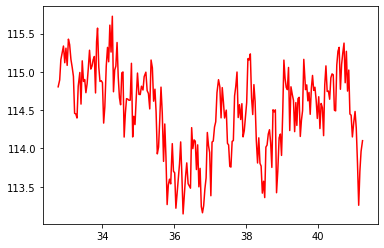

In [5]:
data=np.loadtxt(os.path.join(path,result[-1]),delimiter=",").transpose()
plt.plot(data[0],data[1],c='r')
# plt.plot(data[0],data[2],c='g')
find_argmax([data[0],data[2]],20)

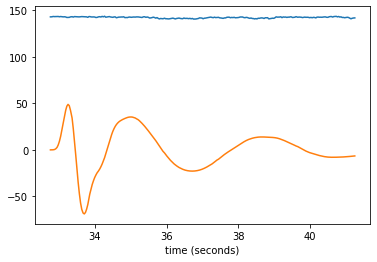

In [17]:
from scipy.signal import butter, lfilter
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    # Sample rate and desired cutoff frequencies (in Hz).
#     fs = 50.0
#     lowcut = 0.8
#     highcut = 6
    fs = 100
    lowcut = 0.8
    highcut = 6
    # Filter a noisy signal.
    T = data[0][-1]-data[0][0]
    nsamples = int(T * fs)
#     a = 0.02

    t=data[0]
    x=X_[2]
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal')
    plt.xlabel('time (seconds)')
    plt.axis('tight')
#     plt.legend(loc='upper left')

    plt.show()


run()

In [14]:
from sklearn.decomposition import FastICA
X=data[1:]
transformer = FastICA(n_components=3,
        random_state=0)
X_transformed = transformer.fit_transform(X)
# A_ = ica.mixing_
# A_
X_transformed.shape
# X_transformed
X_ = np.matmul(np.linalg.inv(X_transformed),X)
X_.shape

(3, 250)

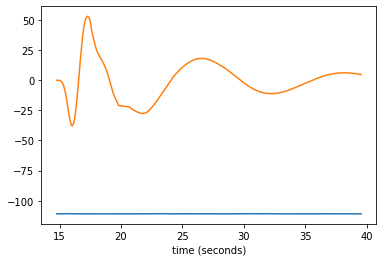

In [59]:
def filter_data(f_s = 100.0, low=0.8, high=6):
    fs = f_s
    lowcut = low
    highcut = high
    


T = data[0][-1]-data[0][0]
# nsamples = int(T * fs)
#     t = np.linspace(0, T, nsamples, endpoint=False)
a = 0.02
#     f0 = 600.0
#     x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
#     x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
#     x += a * np.cos(2 * np.pi * f0 * t + .11)
#     x += 0.03 * np.cos(2 * np.pi * 2000 * t)
#     print(len(x))
t=data[0]
x=X_[1]
plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (seconds)')

plt.axis('tight')

plt.show()

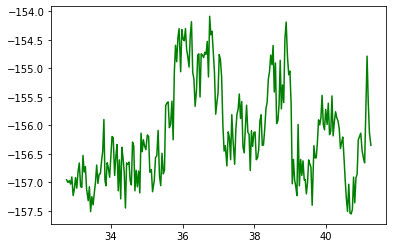

In [16]:
plt.plot(data[0],X_[1],"g")

In [13]:
from scipy import fftpack

def find_argmax(data, start = 20):
    times = data[0]
    color = data[1]
    L = len(data[0])
    even_times = np.linspace(times[0], times[-1], L)
    interpolated = np.interp(even_times, times, color)
    interpolated = np.hamming(L) * interpolated  # a wave with width L * interpolated value
    interpolated = interpolated - np.mean(interpolated)  # standardisation?
    raw = np.fft.rfft(interpolated)
    peak = np.abs(raw)

    freqs = np.fft.rfftfreq(len(times))*10*60
    # freqs = float(fps) / L * np.arange(L / 2 + 1) *60
    # print(freqs)
    
    fig, ax=plt.subplots()
    ax.set_xlabel("Frequency")
    ax.set_ylabel("frequency domain")
    k=start
    ax.stem(freqs[k:],np.abs(raw[k:]))
    print(np.argmax(peak[k:]))
    print(freqs[k+np.argmax(peak[k:])])
          
#     return freqs[k+np.argmax(peak[k:])]

C:\Users\yexue\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


15
84.00000000000001


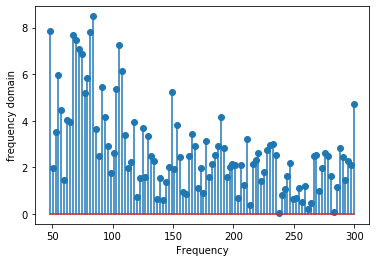

In [15]:
find_argmax([data[0],X_[1]],20)